In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
cmap = sns.cubehelix_palette(8, as_cmap=True)

# Unique-Complementary-Synergistic decomposition

Define input probability distribution. This is $P(x,y,z)$, and must be given as a flat array containing the values of the joint probabilities: `P[0]` will be  

In [12]:
P = np.array([1, 1, 1, 0, 0, 0, 0, 1], dtype=np.float)/4 # this is an AND gate for testing

Define optimisation domain

In [13]:
gamma_0 = np.array([1, -1, -1, 1, 0, 0, 0, 0], dtype=np.float)
gamma_1 = np.array([0, 0, 0, 0, 1, -1, -1, 1], dtype=np.float)

The optimisation domain is parametrized by
\begin{equation}
    Q(a,b) = P + a\gamma_0 + b\gamma_1 
\end{equation}
where $a$ and $b$ are such that
\begin{gather}
    a \le \min\left( \min_{i\in \{2,3\}}P_i, 1-\max_{i\in \{1,4\}} P_i\right)\\
    a \ge -\min\left( 1 -\max_{i\in \{2,3\}}P_i, \min_{i\in \{1,4\}} P_i\right)\\
    b \le \min\left( \min_{i\in \{6,7\}}P_i, 1-\max_{i\in \{5,8\}} P_i\right)\\
    b \ge -\min\left( 1 -\max_{i\in \{6,7\}}P_i, \min_{i\in \{5,8\}} P_i\right)
\end{gather}
to ensure that $Q_i(a,b)>0$ for all $i,a,b$.

In [19]:
def a_bounds(P):
    upper = min(min(P[1], P[2]), 1-max(P[0], P[3]))
    lower = -min(1-max(P[1],P[2]), min(P[0], P[3]))
    return lower, upper

def b_bounds(P):
    upper = min(min(P[5], P[6]), 1-max(P[4], P[7]))
    lower = -min(1-max(P[5],P[6]), min(P[4], P[7]))
    return lower, upper
print a_bounds(P), b_bounds(P)
np.array?

(-0.0, 0.25) (-0.0, 0.0)


In [15]:
a_range = np.linspace(a_bounds(P)[0], a_bounds(P)[1], 100)
b_range = np.linspace(b_bounds(P)[0], b_bounds(P)[1], 100)
AA, BB = np.meshgrid(a_range, b_range)

In [16]:
def I_2D(Q):
    QX = np.atleast_2d(Q.sum(axis=1))
    QY = np.atleast_2d(Q.sum(axis=0))
    if min(QX.min(), QY.min()) < 0 or Q.min()<0:
        raise Exception
    table = Q * np.log2(Q / (QX.transpose() * QY))
    return table[Q>0].sum()

def I_Q_XY(Q):
    QXY = Q.reshape((2,2,2)).sum(axis=2)
    return I_2D(QXY)

def I_Q_XY_Z(Q):
    Q_XYZ = Q.reshape((2,2,2))
    return Q_XYZ[:,:,0].sum() * I_2D(Q_XYZ[:,:,0]/Q_XYZ[:,:,0].sum()) + Q_XYZ[:,:,1].sum() * I_2D(Q_XYZ[:,:,1]/Q_XYZ[:,:,1].sum())

def CoI_Q(a, b):
    # co-information CoI_Q(C;fUr;fUo)
    Q = P + a * gamma_0 + b * gamma_1
    return I_Q_XY(Q) - I_Q_XY_Z(Q)


-0.0534944364305 -6.48323861744e-07


<matplotlib.contour.QuadContourSet instance at 0x41ed5f0>

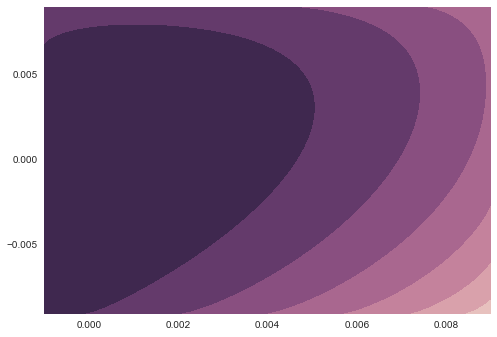

In [22]:
CoIQQ = np.zeros_like(AA)

for i in range(AA.shape[0]):
    for j in range(AA.shape[1]):
        CoIQQ[i,j] = CoI_Q(AA[i,j], BB[i,j])
print CoIQQ.min(), CoIQQ.max()

SI_cfUrfUo = CoIQQ.max()
UI_cfUr = I_cfUr - SI_cfUrfUo
UI_cfUo = I_cfUo - SI_cfUrfUo
CI_cfUrfUo = I_cfUrfUo - SI_cfUrfUo - UI_cfUr - UI_cfUo

fig, ax = plt.subplots()
ax.contourf(AA,BB,CoIQQ, cmap=cmap)

In [23]:
print("H(C) = {:g} bits".format(H_c))
print("MI(C:F_R) = {:g} bits".format(I_cfUr))
print("MI(C:F_O) = {:g} bits".format(I_cfUo))
print("MI(C:(F_R, F_O)) = {:g} bits".format(I_cfUrfUo))
print("SI(C: F_R; F_O) = {:g} bits".format(SI_cfUrfUo))
print("CI(C: F_R; F_O) = {:g} bits".format(CI_cfUrfUo))
print("UI(C: F_R \ F_O) = {:g} bits".format(UI_cfUr))
print("UI(C: F_O \ F_R) = {:g} bits".format(UI_cfUo))

H(C) = 0.680077 bits
MI(C:F_R) = -2.02136e-16 bits
MI(C:F_O) = 0.211081 bits
MI(C:(F_R, F_O)) = 0.211081 bits
SI(C: F_R; F_O) = -6.48324e-07 bits
CI(C: F_R; F_O) = -6.48324e-07 bits
UI(C: F_R \ F_O) = 6.48324e-07 bits
UI(C: F_O \ F_R) = 0.211082 bits


In [1]:
from information_decomposition import decomposition

In [2]:
decomposition?

In [ ]:
tnu